In [1]:
#creating of dataframe by using 4 vectors
fy <- c(2010,2011,2012,2010,2011,2012,2010,2011,2012)
company <- c("Apple","Apple","Apple","Google","Google",
"Google","Microsoft","Microsoft","Microsoft")
revenue <- c(65225,108249,156508,29321,37905,50175,62484,
69943,73723)
profit <- c(14013,25922,41733,8505,9737,10737,18760,23150,
16978)
companiesData <- data.frame(fy, company, revenue, profit)

In [2]:
#head(companiesData)
str(companiesData)

'data.frame':	9 obs. of  4 variables:
 $ fy     : num  2010 2011 2012 2010 2011 ...
 $ company: Factor w/ 3 levels "Apple","Google",..: 1 1 1 2 2 2 3 3 3
 $ revenue: num  65225 108249 156508 29321 37905 ...
 $ profit : num  14013 25922 41733 8505 9737 ...


In [3]:
summary(companiesData)

       fy            company     revenue           profit     
 Min.   :2010   Apple    :3   Min.   : 29321   Min.   : 8505  
 1st Qu.:2010   Google   :3   1st Qu.: 50175   1st Qu.:10737  
 Median :2011   Microsoft:3   Median : 65225   Median :16978  
 Mean   :2011                 Mean   : 72615   Mean   :18837  
 3rd Qu.:2012                 3rd Qu.: 73723   3rd Qu.:23150  
 Max.   :2012                 Max.   :156508   Max.   :41733  

In [4]:
#convert fy into factor
companiesData$fy <- factor(companiesData$fy,ordered = TRUE)


In [5]:
# adding  a column to an existing dataframe
companiesData$margin <- (companiesData$profit/companiesData$revenue)*100


In [6]:
head(companiesData)

fy,company,revenue,profit,margin
2010,Apple,65225,14013,21.48409
2011,Apple,108249,25922,23.94664
2012,Apple,156508,41733,26.66509
2010,Google,29321,8505,29.00651
2011,Google,37905,9737,25.68790
2012,Google,50175,10737,21.39910


In [7]:
str(companiesData)


'data.frame':	9 obs. of  5 variables:
 $ fy     : Ord.factor w/ 3 levels "2010"<"2011"<..: 1 2 3 1 2 3 1 2 3
 $ company: Factor w/ 3 levels "Apple","Google",..: 1 1 1 2 2 2 3 3 3
 $ revenue: num  65225 108249 156508 29321 37905 ...
 $ profit : num  14013 25922 41733 8505 9737 ...
 $ margin : num  21.5 23.9 26.7 29 25.7 ...


In [8]:
companiesData$margin <- round(companiesData$margin, 1)

In [9]:
head(companiesData)

fy,company,revenue,profit,margin
2010,Apple,65225,14013,21.5
2011,Apple,108249,25922,23.9
2012,Apple,156508,41733,26.7
2010,Google,29321,8505,29.0
2011,Google,37905,9737,25.7
2012,Google,50175,10737,21.4


In [10]:
#Delete perticular column
companiesData <-companiesData[,c(1:4)]

In [11]:
head(companiesData)

fy,company,revenue,profit
2010,Apple,65225,14013
2011,Apple,108249,25922
2012,Apple,156508,41733
2010,Google,29321,8505
2011,Google,37905,9737
2012,Google,50175,10737


**Syntax 2: R’s transform() function:**  
sum of two columns and store that into a new column with transform(), you would use code such as:
**Syntax:**
dataFrame <- transform(dataFrame, newColumn =  
oldColumn1 + oldColumn2)  

In [12]:
companiesData <- transform(companiesData, margin =
round((profit/revenue) * 100, 1))

In [13]:
companiesData


fy,company,revenue,profit,margin
2010,Apple,65225,14013,21.5
2011,Apple,108249,25922,23.9
2012,Apple,156508,41733,26.7
2010,Google,29321,8505,29.0
2011,Google,37905,9737,25.7
2012,Google,50175,10737,21.4
2010,Microsoft,62484,18760,30.0
2011,Microsoft,69943,23150,33.1
2012,Microsoft,73723,16978,23.0


In [14]:
#data manipulate by using apply function
#apply(companiesData, 1, function(x) sum(x))
    

In [15]:
apply(companiesData[,c('revenue', 'profit')], 1,
function(x) sum(x))

[1]  79238 134171 198241  37826  47642  60912  81244  93093  90701

In [16]:
companiesData$sums <- apply(companiesData[,
c('revenue', 'profit')], 1, function(x) sum(x))

In [17]:
companiesData

fy,company,revenue,profit,margin,sums
2010,Apple,65225,14013,21.5,79238
2011,Apple,108249,25922,23.9,134171
2012,Apple,156508,41733,26.7,198241
2010,Google,29321,8505,29.0,37826
2011,Google,37905,9737,25.7,47642
2012,Google,50175,10737,21.4,60912
2010,Microsoft,62484,18760,30.0,81244
2011,Microsoft,69943,23150,33.1,93093
2012,Microsoft,73723,16978,23.0,90701


In [18]:
companiesData$margin <- apply(companiesData[,
c('revenue', 'profit')], 1,
function(x) { (x[2]/x[1]) * 100 } )

In [19]:
companiesData


fy,company,revenue,profit,margin,sums
2010,Apple,65225,14013,21.48409,79238
2011,Apple,108249,25922,23.94664,134171
2012,Apple,156508,41733,26.66509,198241
2010,Google,29321,8505,29.00651,37826
2011,Google,37905,9737,25.68790,47642
2012,Google,50175,10737,21.39910,60912
2010,Microsoft,62484,18760,30.02369,81244
2011,Microsoft,69943,23150,33.09838,93093
2012,Microsoft,73723,16978,23.02945,90701


In [20]:
highestMargin <- max(companiesData$margin)
highestMargin

[1] 33.09838

In [21]:
highestMargin <- companiesData[companiesData$margin == max(companiesData$margin),]
highestMargin
companiesData$margin == max(companiesData$margin)

,fy,company,revenue,profit,margin,sums
8,2011,Microsoft,69943,23150,33.09838,93093


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE

In [22]:
#?subset


highestMargin <- subset(companiesData,margin==max(margin))
#airquality
#subset(airquality, Temp > 80, select = c(Ozone, Temp))

In [23]:
highestMargin

,fy,company,revenue,profit,margin,sums
8,2011,Microsoft,69943,23150,33.09838,93093


# Dplyr

**syntax:**
ddply(mydata, c('column name of a factor to group by',  
'column name of the second factor to group by'), summarize  
OR transform, newcolumn = myfunction(column name(s) I  
want the function to act upon))  

In [24]:
library("plyr")
companiesData

fy,company,revenue,profit,margin,sums
2010,Apple,65225,14013,21.48409,79238
2011,Apple,108249,25922,23.94664,134171
2012,Apple,156508,41733,26.66509,198241
2010,Google,29321,8505,29.00651,37826
2011,Google,37905,9737,25.68790,47642
2012,Google,50175,10737,21.39910,60912
2010,Microsoft,62484,18760,30.02369,81244
2011,Microsoft,69943,23150,33.09838,93093
2012,Microsoft,73723,16978,23.02945,90701


In [25]:
highestProfitMargins <- ddply(companiesData,'company', summarize, bestMargin = max(margin))
highestProfitMargins

company,bestMargin
Apple,26.66509
Google,29.00651
Microsoft,33.09838


In [26]:
highestProfitMargins <- ddply(companiesData,
'company', transform, bestMargin = max(margin))

In [27]:
highestProfitMargins


fy,company,revenue,profit,margin,sums,bestMargin
2010,Apple,65225,14013,21.48409,79238,26.66509
2011,Apple,108249,25922,23.94664,134171,26.66509
2012,Apple,156508,41733,26.66509,198241,26.66509
2010,Google,29321,8505,29.00651,37826,29.00651
2011,Google,37905,9737,25.68790,47642,29.00651
2012,Google,50175,10737,21.39910,60912,29.00651
2010,Microsoft,62484,18760,30.02369,81244,33.09838
2011,Microsoft,69943,23150,33.09838,93093,33.09838
2012,Microsoft,73723,16978,23.02945,90701,33.09838


In [28]:
highestProfitMargins <- ddply(companiesData,
'company', function(x) x[x$margin==max(x$margin),])

In [29]:
highestProfitMargins
companiesData



fy,company,revenue,profit,margin,sums
2012,Apple,156508,41733,26.66509,198241
2010,Google,29321,8505,29.00651,37826
2011,Microsoft,69943,23150,33.09838,93093


fy,company,revenue,profit,margin,sums
2010,Apple,65225,14013,21.48409,79238
2011,Apple,108249,25922,23.94664,134171
2012,Apple,156508,41733,26.66509,198241
2010,Google,29321,8505,29.00651,37826
2011,Google,37905,9737,25.68790,47642
2012,Google,50175,10737,21.39910,60912
2010,Microsoft,62484,18760,30.02369,81244
2011,Microsoft,69943,23150,33.09838,93093
2012,Microsoft,73723,16978,23.02945,90701


In [30]:
companiesData[companiesData$margin==max(companiesData$margin),]

,fy,company,revenue,profit,margin,sums
8,2011,Microsoft,69943,23150,33.09838,93093


In [31]:
highestProfitMargins <- ddply(companiesData,
'company', summarize, bestMargin = max(margin))

In [32]:
highestProfitMargins

company,bestMargin
Apple,26.66509
Google,29.00651
Microsoft,33.09838


In [33]:
#install.packages("dplyr",repos = "http://cran.us.r-project.org", type="source",dependencies=TRUE)
library("dplyr")
myresults <- companiesData %>%
group_by(company) %>%
mutate(highestMargin = max(margin), lowestMargin =
min(margin))


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [34]:
myresults

fy,company,revenue,profit,margin,sums,highestMargin,lowestMargin
2010,Apple,65225,14013,21.48409,79238,26.66509,21.48409
2011,Apple,108249,25922,23.94664,134171,26.66509,21.48409
2012,Apple,156508,41733,26.66509,198241,26.66509,21.48409
2010,Google,29321,8505,29.00651,37826,29.00651,21.39910
2011,Google,37905,9737,25.68790,47642,29.00651,21.39910
2012,Google,50175,10737,21.39910,60912,29.00651,21.39910
2010,Microsoft,62484,18760,30.02369,81244,33.09838,23.02945
2011,Microsoft,69943,23150,33.09838,93093,33.09838,23.02945
2012,Microsoft,73723,16978,23.02945,90701,33.09838,23.02945


In [35]:
highestProfitMargins <- companiesData %>%
group_by(company) %>%
summarise(bestMargin = max(margin))

In [36]:
highestProfitMargins

company,bestMargin
Apple,26.66509
Google,29.00651
Microsoft,33.09838


In [37]:
vDates <- as.Date(c("2013-06-01", "2013-07-08",
"2013-09-01", "2013-09-15"))

In [38]:
vDates

[1] "2013-06-01" "2013-07-08" "2013-09-01" "2013-09-15"

In [39]:
vDates.bymonth <- cut(vDates, breaks = "month")

In [40]:
vDates.bymonth

[1] 2013-06-01 2013-07-01 2013-09-01 2013-09-01
Levels: 2013-06-01 2013-07-01 2013-08-01 2013-09-01

In [41]:
dfDates <- data.frame(vDates, vDates.bymonth)

In [42]:
#orddfDates

In [43]:
#order functions

companyOrder <- order(companiesData$margin)

In [44]:
companyOrder

[1] 6 1 9 2 5 3 4 7 8

In [45]:
companiesOrdered <- companiesData[companyOrder,]

In [46]:
companiesOrdered


,fy,company,revenue,profit,margin,sums
6,2012,Google,50175,10737,21.39910,60912
1,2010,Apple,65225,14013,21.48409,79238
9,2012,Microsoft,73723,16978,23.02945,90701
2,2011,Apple,108249,25922,23.94664,134171
5,2011,Google,37905,9737,25.68790,47642
3,2012,Apple,156508,41733,26.66509,198241
4,2010,Google,29321,8505,29.00651,37826
7,2010,Microsoft,62484,18760,30.02369,81244
8,2011,Microsoft,69943,23150,33.09838,93093


In [47]:
sort(companiesOrdered$margin)

[1] 21.39910 21.48409 23.02945 23.94664 25.68790 26.66509 29.00651 30.02369
[9] 33.09838

# dplyr Package

1. filter – It filters the data based on a condition  
2. select – It is used to select columns of interest from a data set  
3. arrange – It is used to arrange data set values on ascending or descending order  
4. mutate – It is used to create new variables from existing variables  
5. summarise (with group_by) – It is used to perform analysis by commonly used operations such as min, max, mean count etc  

In [48]:
library(dplyr)

In [50]:
data("mtcars")
data('iris') 

In [52]:
mydata <- mtcars
head(mydata)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [53]:
class(mydata)

[1] "data.frame"

In [54]:
mynewdata <- tbl_df(mydata) # making the mtcars data  as local dataframe
myirisdata <- tbl_df(iris)  # making the iris data  as local dataframe

In [57]:
#mynewdata
#myirisdata

In [60]:
filter(mynewdata, cyl > 4 | gear < 2)  #use filter to filter data with required condition

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [65]:
select(mynewdata, cyl,mpg,-hp)
#mtcars[,c(mtcars$cyl,mtcars$mpg)]
mtcars[,c(2,1)]

,cyl,mpg
Mazda RX4,6,21.0
Mazda RX4 Wag,6,21.0
Datsun 710,4,22.8
Hornet 4 Drive,6,21.4
Hornet Sportabout,8,18.7
Valiant,6,18.1
Duster 360,8,14.3
Merc 240D,4,24.4
Merc 230,4,22.8
Merc 280,6,19.2


,cyl,mpg
Mazda RX4,6,21.0
Mazda RX4 Wag,6,21.0
Datsun 710,4,22.8
Hornet 4 Drive,6,21.4
Hornet Sportabout,8,18.7
Valiant,6,18.1
Duster 360,8,14.3
Merc 240D,4,24.4
Merc 230,4,22.8
Merc 280,6,19.2


In [66]:
select(mynewdata, cyl:gear)

,cyl,disp,hp,drat,wt,qsec,vs,am,gear
Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4
Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4
Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3
Valiant,6,225.0,105,2.76,3.460,20.22,1,0,3
Duster 360,8,360.0,245,3.21,3.570,15.84,0,0,3
Merc 240D,4,146.7,62,3.69,3.190,20.00,1,0,4
Merc 230,4,140.8,95,3.92,3.150,22.90,1,0,4
Merc 280,6,167.6,123,3.92,3.440,18.30,1,0,4


In [67]:
mynewdata %>% select(cyl, wt, gear) %>% filter(wt > 2)

cyl,wt,gear
6,2.620,4
6,2.875,4
4,2.320,4
6,3.215,3
8,3.440,3
6,3.460,3
8,3.570,3
4,3.190,4
4,3.150,4
6,3.440,4


In [68]:
mynewdata %>% select(cyl, wt, gear) %>% arrange(wt,de) #arrange can be used to reorder rows

cyl,wt,gear
4,1.513,5
4,1.615,4
4,1.835,4
4,1.935,4
4,2.140,5
4,2.200,4
4,2.320,4
4,2.465,3
6,2.620,4
6,2.770,5


In [69]:
mynewdata%>%select(cyl, wt, gear)%>%arrange(desc(wt)) #for descending

cyl,wt,gear
8,5.424,3
8,5.345,3
8,5.250,3
8,4.070,3
8,3.845,3
8,3.840,3
8,3.780,3
8,3.730,3
8,3.570,3
8,3.570,5


In [71]:
mynewdata %>% select(mpg, cyl) %>% mutate(newvariable = mpg*cyl)

mpg,cyl,newvariable
21.0,6,126.0
21.0,6,126.0
22.8,4,91.2
21.4,6,128.4
18.7,8,149.6
18.1,6,108.6
14.3,8,114.4
24.4,4,97.6
22.8,4,91.2
19.2,6,115.2


In [75]:
df <- c(5,8,9,6,7,NA)

mean(df,na.rm=TRUE)

[1] 7

In [76]:
myirisdata %>% group_by(Species) %>% summarise(Average = mean(Sepal.Length, na.rm = TRUE))

Species,Average
setosa,5.006
versicolor,5.936
virginica,6.588


In [77]:
myirisdata


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [9]:
data("airquality")
mydata <- airquality
data(iris)
myiris <- iris

In [85]:
install.packages("data.table",repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/Suman/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Suman\AppData\Local\Temp\RtmpqwPk3R\downloaded_packages


In [5]:
library(data.table)

In [11]:
mydata <- data.table(mydata) 
mydata # in a form of data table 

myiris <- data.table(myiris) 

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9
NA,194,8.6,69,5,10


In [ ]:
mydata[2:4,]
airquality[2:4,]

In [15]:
myiris[Species == 'setosa']

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [17]:
subset(iris,iris$Species == 'setosa')

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [18]:
myiris[Species %in% c('setosa', 'virginica')] 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [ ]:
mydata[,Temp] # #select columns. Returns a vector

In [ ]:
airquality[,c("Wind","Temp")]

In [33]:
mydata[,.(Temp,Month)]

Temp,Month
67,5
72,5
74,5
62,5
56,5
66,5
65,5
59,5
61,5
69,5


In [26]:
mydata[,sum(Ozone, na.rm = TRUE)]

[1] NA

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



  [1] 5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 [19] 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 [37] 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 [55] 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 [73] 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 [91] 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
[109] 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
[127] 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
[145] 6.7 6.7 6.3 6.5 6.2 5.9


NULL

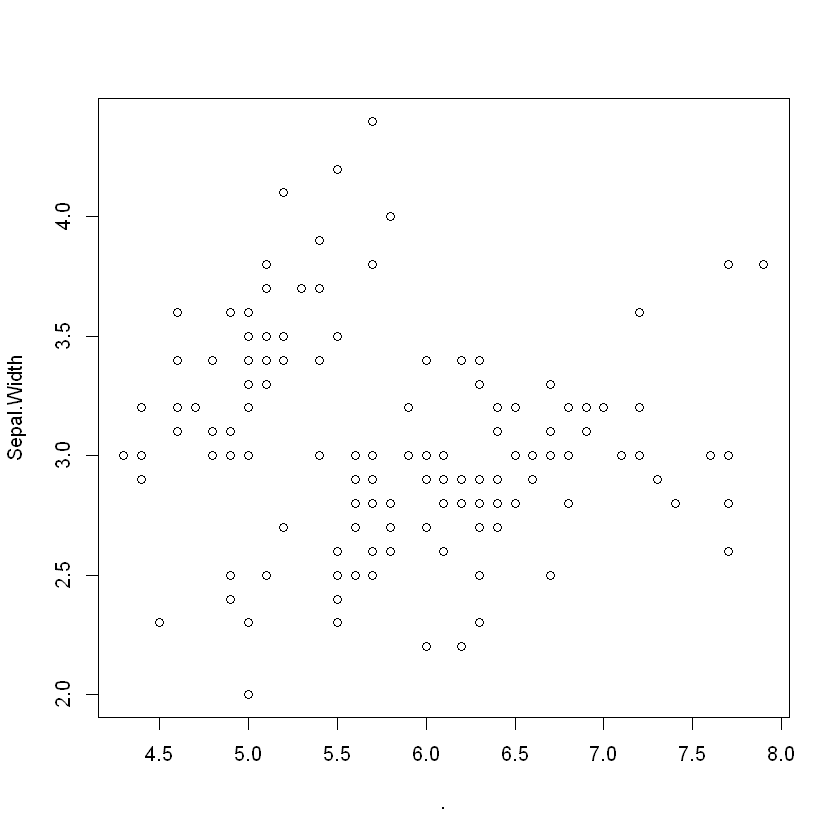

In [30]:
library(dplyr)
myiris[,{print(Sepal.Length) %>% plot(Sepal.Width)}]

In [34]:
myiris[,.(sepalsum = sum(Sepal.Length)), by=Species] #grouping by a variable

Species,sepalsum
setosa,250.3
versicolor,296.8
virginica,329.4


In [39]:
setkey(myiris, Species) #select a column for computation, hence need to set the key on column

In [42]:
#selects all the rows associated with this data point
myiris['setosa']
#iris['setosa']
myiris[c('setosa', 'virginica')]

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


# reshape2 Package

In [43]:
#create a data
ID <- c(1,2,3,4,5)
Names <- c('Joseph','Matrin','Joseph','James','Matrin')
DateofBirth <- c(1993,1992,1993,1994,1992)
Subject<- c('Maths','Biology','Science','Psycology','Physics')

In [44]:
thisdata <- data.frame(ID, Names, DateofBirth, Subject)

In [45]:
data.table(thisdata)

ID,Names,DateofBirth,Subject
1,Joseph,1993,Maths
2,Matrin,1992,Biology
3,Joseph,1993,Science
4,James,1994,Psycology
5,Matrin,1992,Physics


In [46]:
library(reshape2)


Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt



In [ ]:
#melt
#?melt
mt <- melt(thisdata, id=(c('ID','Names')))

In [53]:
thisdata
mt

ID,Names,DateofBirth,Subject
1,Joseph,1993,Maths
2,Matrin,1992,Biology
3,Joseph,1993,Science
4,James,1994,Psycology
5,Matrin,1992,Physics


ID,Names,variable,value
1,Joseph,DateofBirth,1993
2,Matrin,DateofBirth,1992
3,Joseph,DateofBirth,1993
4,James,DateofBirth,1994
5,Matrin,DateofBirth,1992
1,Joseph,Subject,Maths
2,Matrin,Subject,Biology
3,Joseph,Subject,Science
4,James,Subject,Psycology
5,Matrin,Subject,Physics
